# Regresión lineal

In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import tqdm
from functions2 import *

In [3]:
# import data from csv
data = pd.read_csv('/Users/maxi/Downloads/Actuales/ML/ML-TP2/datasets/Student_Performance_DEV.csv').drop(columns='idx')
data

,forecasted_performance,hs_sleep,hs_study,prev_scores,practice,extracurricular_activities
0,6.326605,6.560017,5.043475,4.958906,4,False
1,7.774666,6.459315,3.529156,9.601236,5,False
2,7.343601,6.487913,2.500939,6.390868,4,False
3,1.851852,10.126572,2.311390,4.000000,5,False
4,3.607081,8.093355,3.419712,4.857238,9,False
...,...,...,...,...,...,...
1395,5.010497,6.481511,2.531747,4.598361,3,False
1396,6.280722,6.056482,5.997887,4.408789,8,False
1397,5.492269,5.402522,5.867482,4.000000,5,False
1398,7.002018,6.425094,5.027055,5.284618,6,False


### a) 
Implementar un modelo de regresión lineal con regularización L-2, que estime el desempeño de un estudiante en base a los datos existentes

In [4]:
data = one_hot_encoding(data, 'extracurricular_activities')
train_data, test_data = train_test_split(data, test_size=0.2)
train_data

,forecasted_performance,hs_sleep,hs_study,prev_scores,practice,extracurricular_activities_False,extracurricular_activities_True
0,10.000000,7.512345,5.072058,8.775325,14,0,1
1,10.000000,7.645378,5.266626,8.351701,6,0,1
2,7.423695,7.096499,3.071855,8.498025,2,0,1
3,7.725092,6.454375,3.299192,9.913947,9,1,0
4,4.621869,7.731830,2.091205,4.052463,17,1,0
...,...,...,...,...,...,...,...
1115,5.713498,8.401831,5.314130,4.808138,16,1,0
1116,6.974535,6.644282,4.947815,5.392057,2,1,0
1117,6.844562,7.629650,4.989611,6.980204,9,1,0
1118,6.088489,8.681235,5.776701,8.484583,9,1,0


In [5]:
# implement linear regression with L2 regularization
X_train = train_data.drop(columns=['forecasted_performance'])
y_train = train_data['forecasted_performance'].values

X_test = test_data.drop(columns=['forecasted_performance'])
y_test = test_data['forecasted_performance'].values

# X_train = np.hstack([np.ones((X_train.shape[0], 1)), X_train.values])
# X_test = np.hstack([np.ones((X_test.shape[0], 1)), X_test.values])

print(X_train.shape, y_train.shape, X_test.shape, y_test.shape)
X_test

(1120, 6) (1120,) (280, 6) (280,)


,hs_sleep,hs_study,prev_scores,practice,extracurricular_activities_False,extracurricular_activities_True
0,8.551087,5.289003,6.470879,8,0,1
1,7.409559,2.192232,5.832088,4,0,1
2,6.289469,3.254488,4.000000,7,1,0
3,7.965828,2.160566,5.326978,9,1,0
4,7.313633,2.124937,9.395151,9,1,0
...,...,...,...,...,...,...
275,6.982430,4.037566,8.058580,8,1,0
276,6.515991,5.421584,4.686612,7,1,0
277,8.433206,2.694012,8.559270,14,0,1
278,6.049597,3.582731,7.965237,4,0,1


mse(train) = 1.6012318165325268
mse(test) = 1.5220938998580622


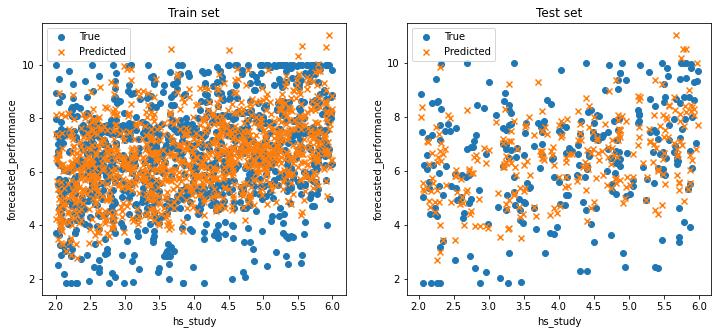

In [6]:
# Train model
W = fit_ridge_regression(X_train, y_train, 0.1)
W

# Predict
y_pred = predict_linear_regression(X_train, W)
# print("y_pred.shape :", y_pred.shape)
# print("y_train.shape :", y_train.shape)

y_pred

# Evaluate
train_error = mse(y_train, y_pred)
print("mse(train) =", train_error)

# on test set
y_pred_test = predict_linear_regression(X_test, W)
test_error = mse(y_test, y_pred_test)
print("mse(test) =", test_error)

# los dos plots juntos en subplots
fig, axs = plt.subplots(1, 2, figsize=(12, 5))
axs[0].scatter(X_train['hs_study'], y_train, label='True')
axs[0].scatter(X_train['hs_study'], y_pred, label='Predicted', marker='x')
axs[0].legend()
axs[0].set_xlabel('hs_study')
axs[0].set_ylabel('forecasted_performance')
axs[0].set_title('Train set')

axs[1].scatter(X_test['hs_study'], y_test, label='True')
axs[1].scatter(X_test['hs_study'], y_pred_test, label='Predicted', marker='x')
axs[1].legend()
axs[1].set_xlabel('hs_study')
axs[1].set_ylabel('forecasted_performance')
axs[1].set_title('Test set')

plt.show()

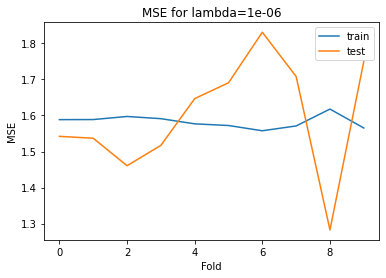

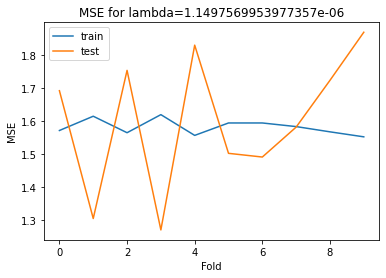

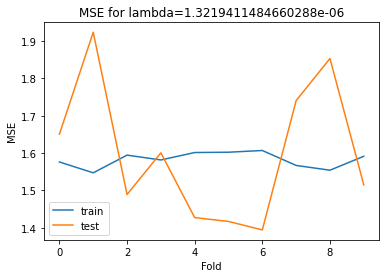

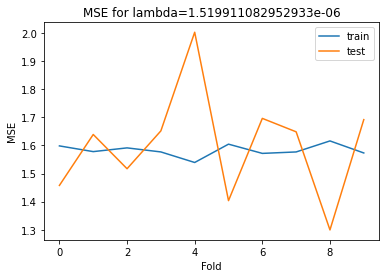

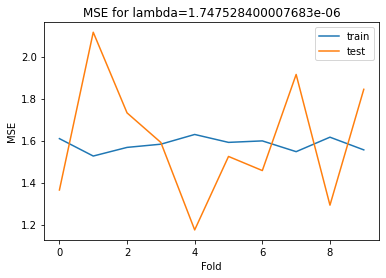

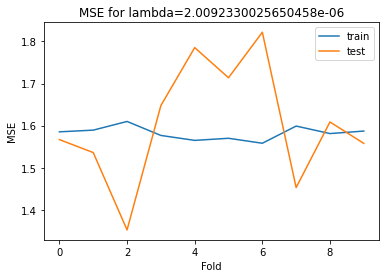

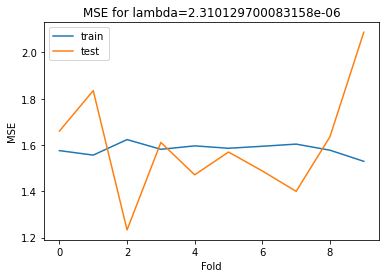

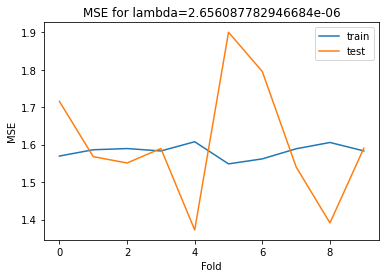

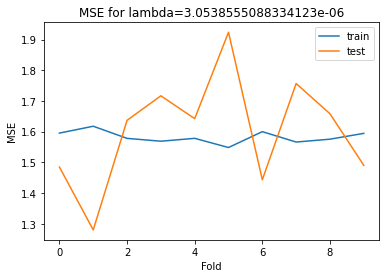

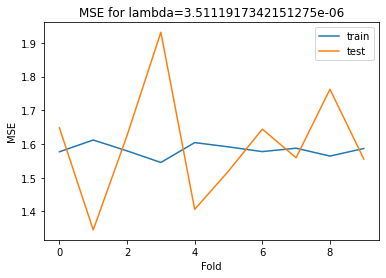

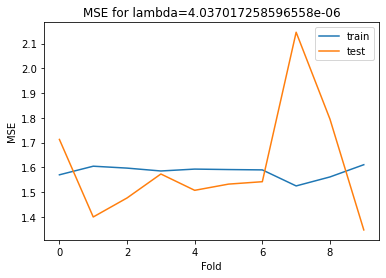

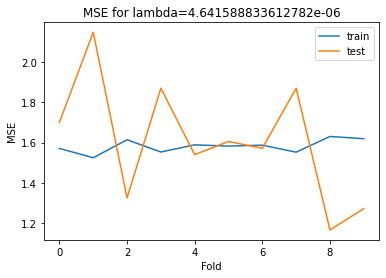

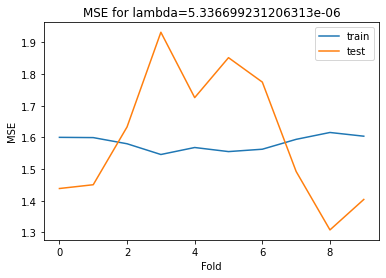

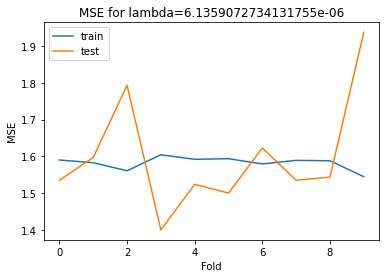

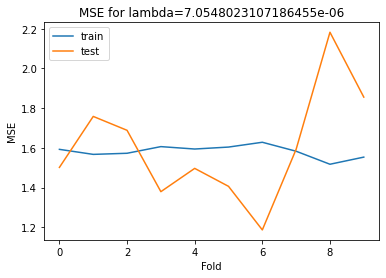

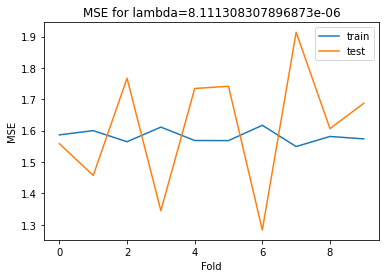

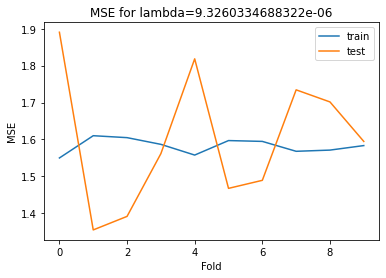

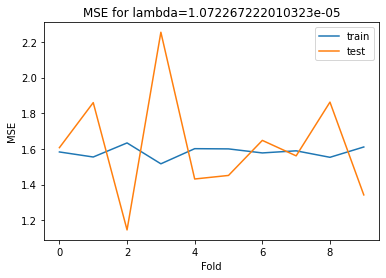

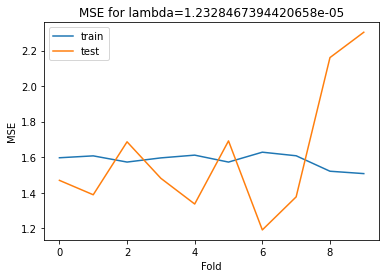

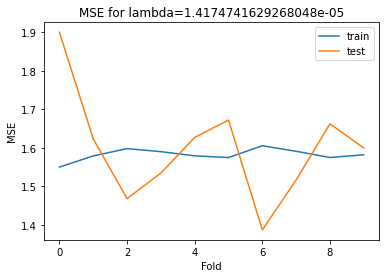

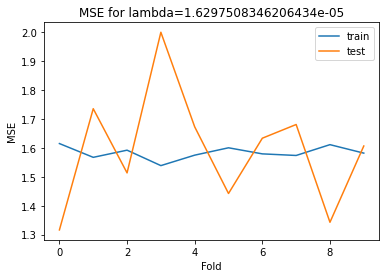

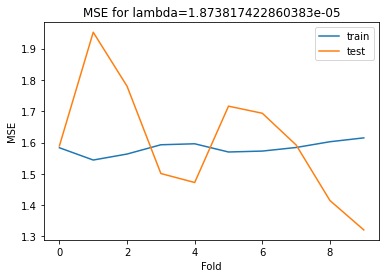

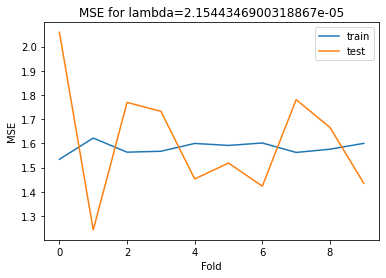

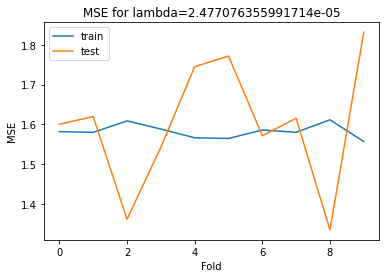

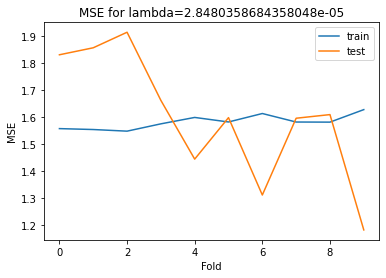

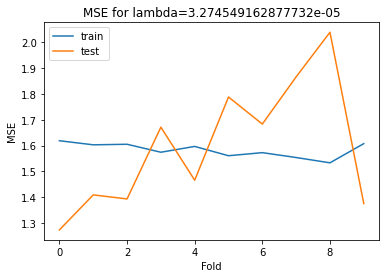

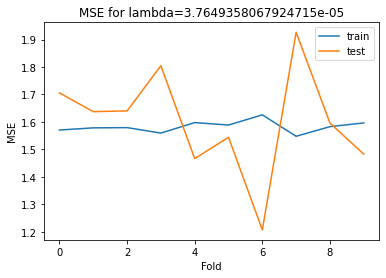

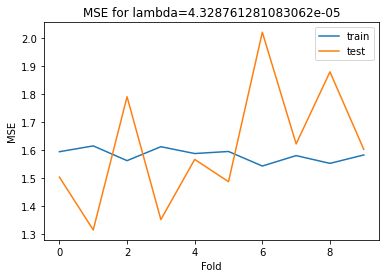

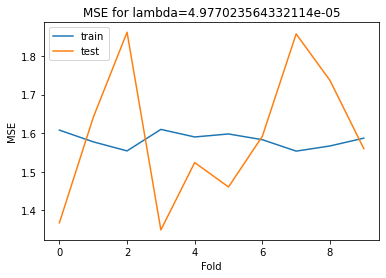

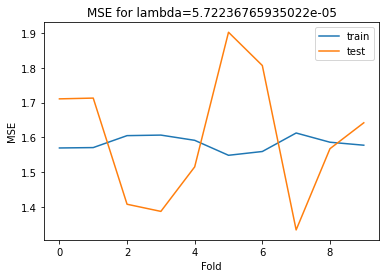

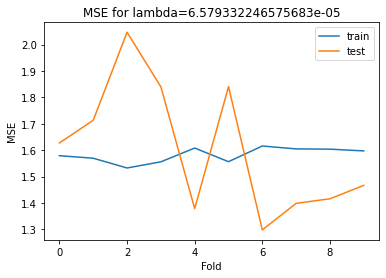

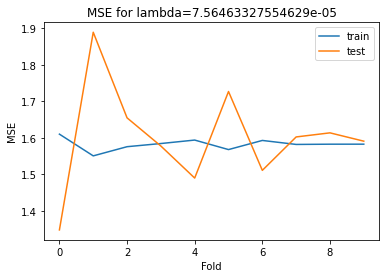

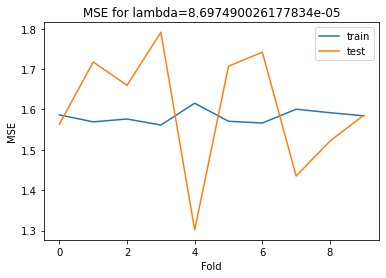

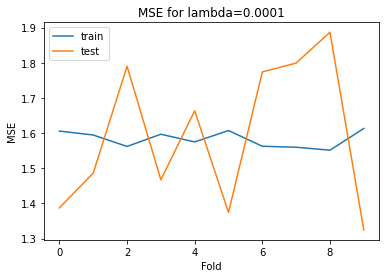

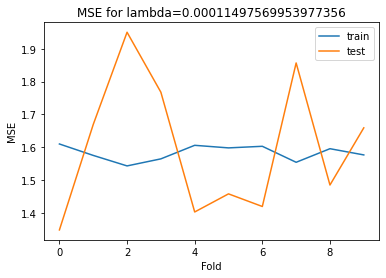

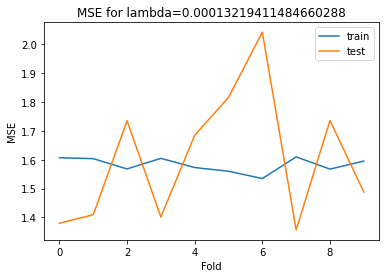

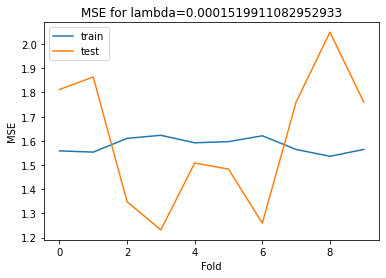

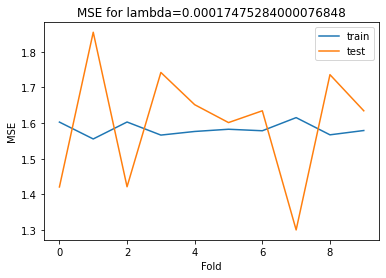

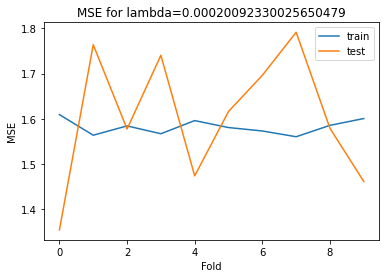

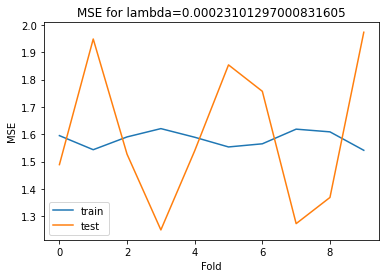

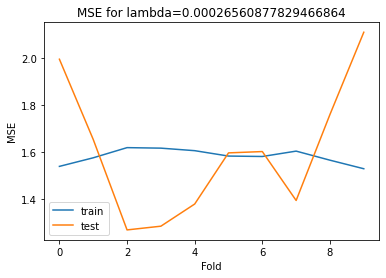

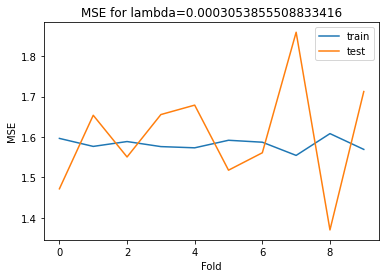

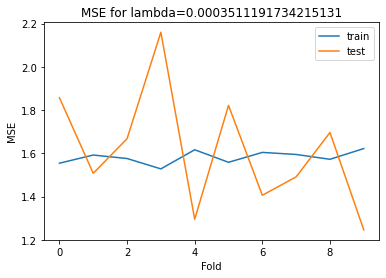

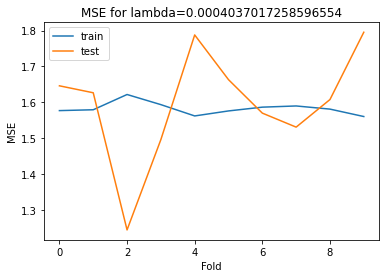

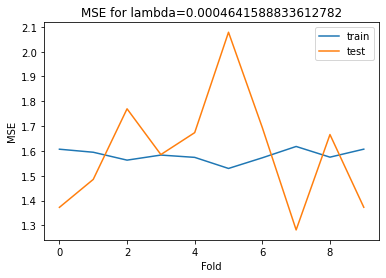

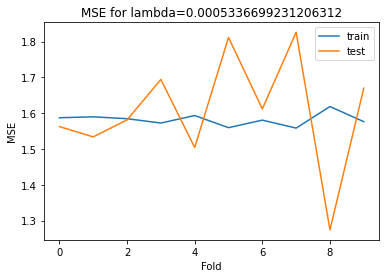

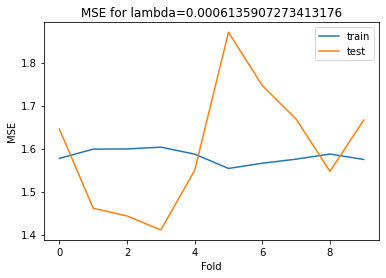

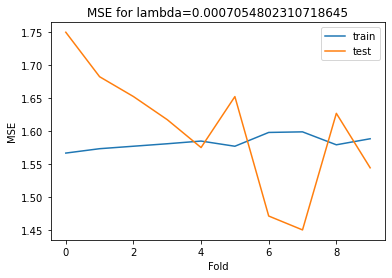

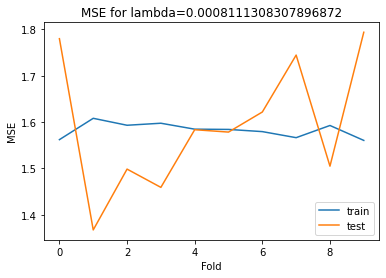

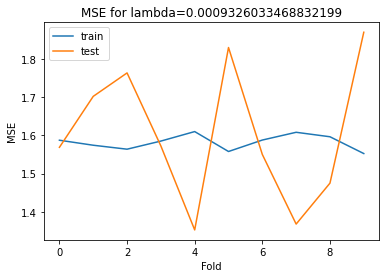

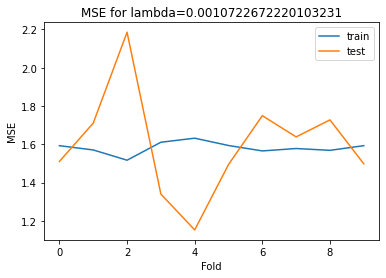

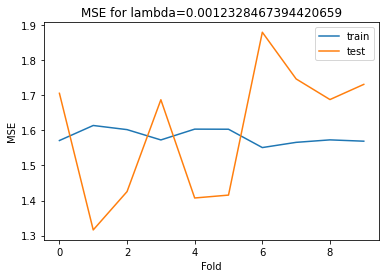

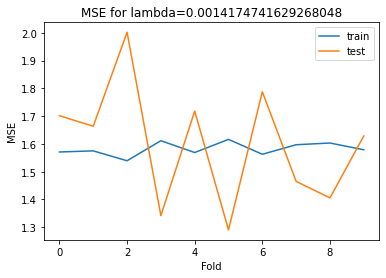

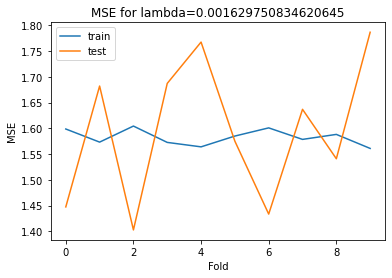

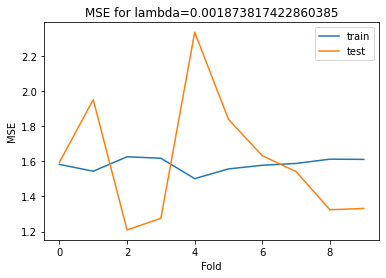

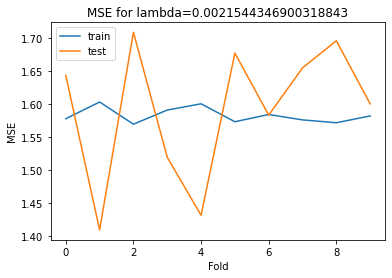

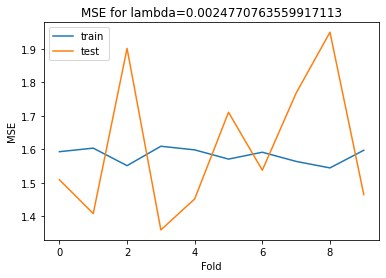

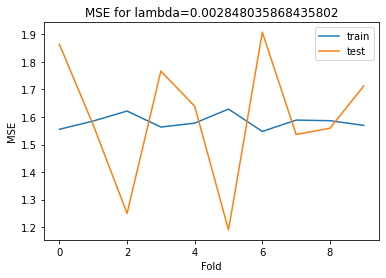

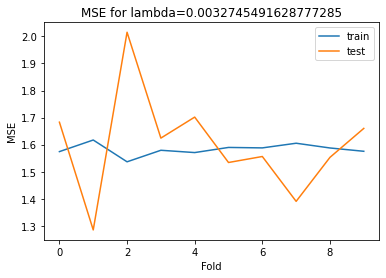

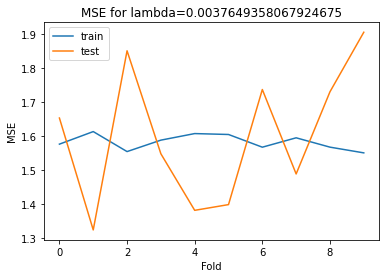

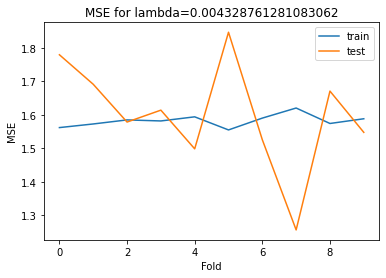

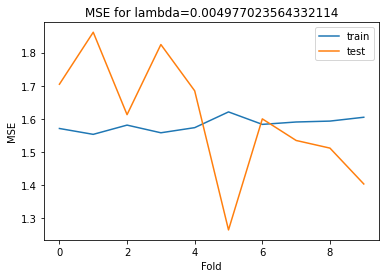

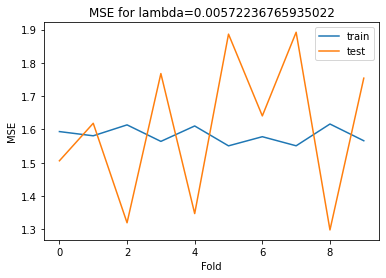

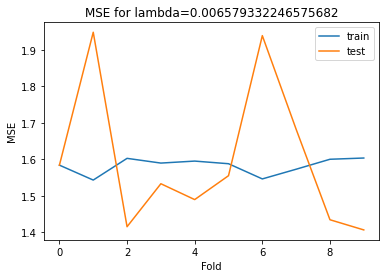

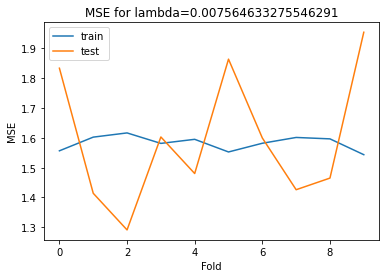

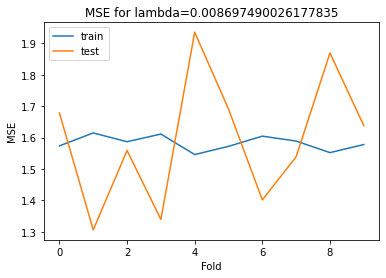

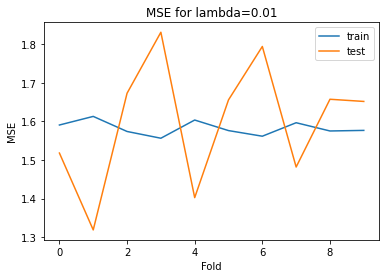

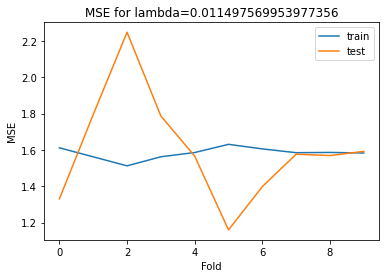

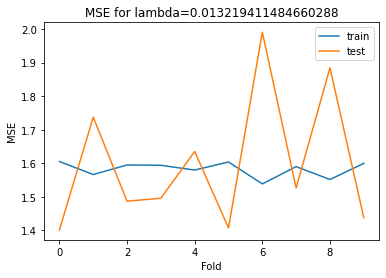

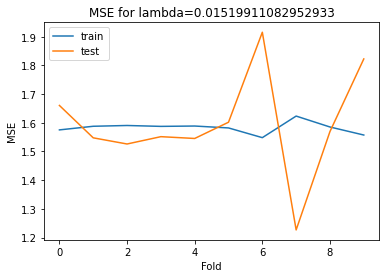

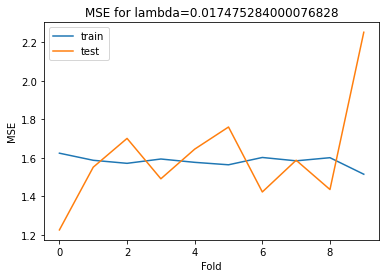

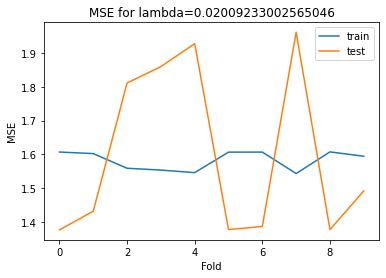

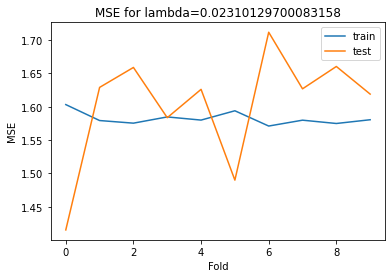

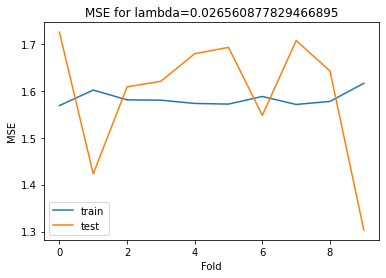

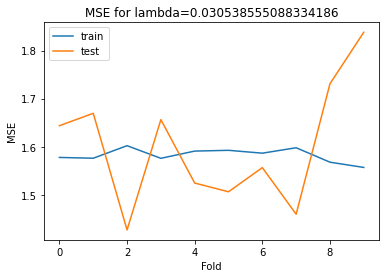

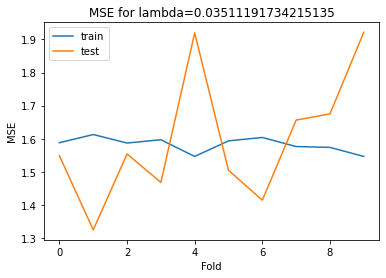

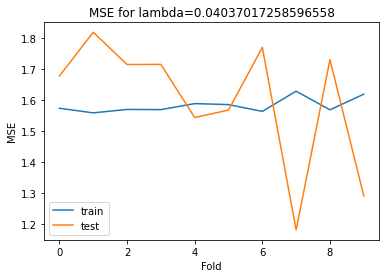

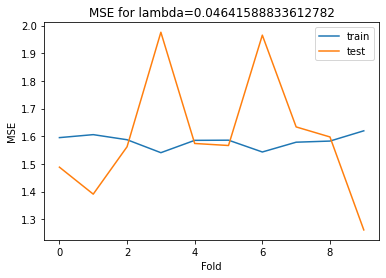

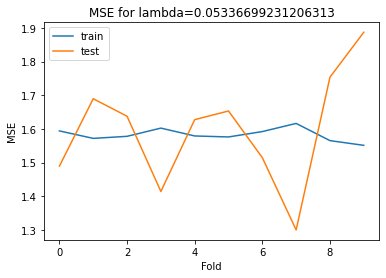

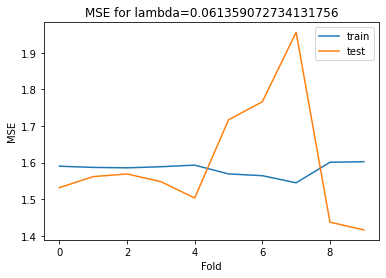

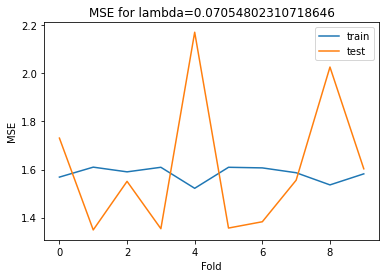

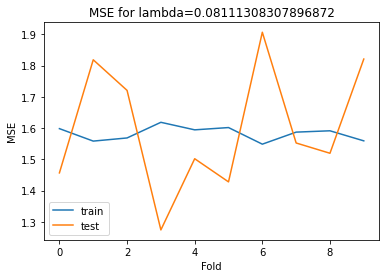

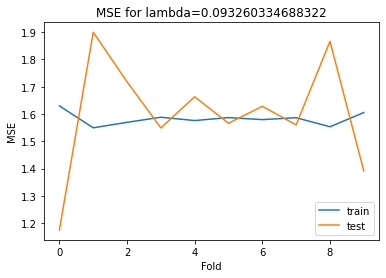

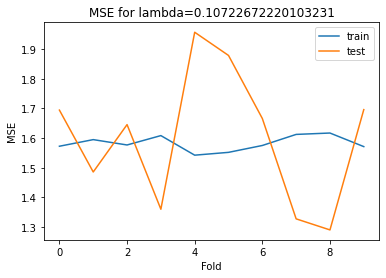

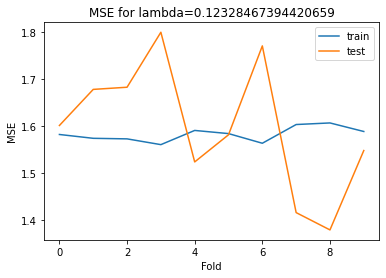

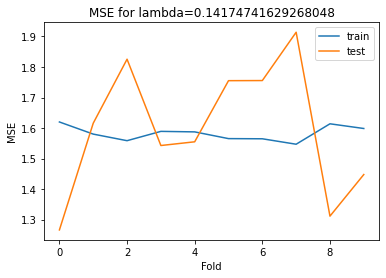

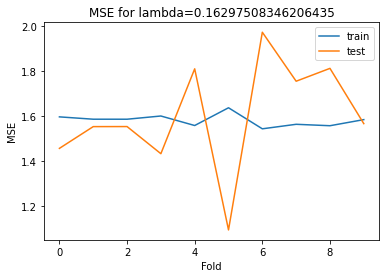

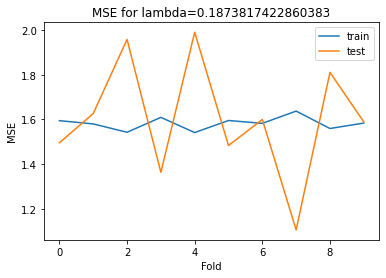

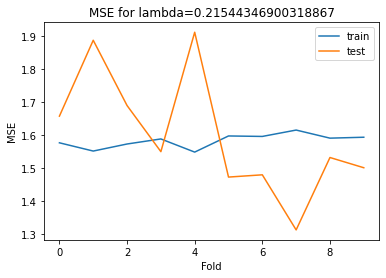

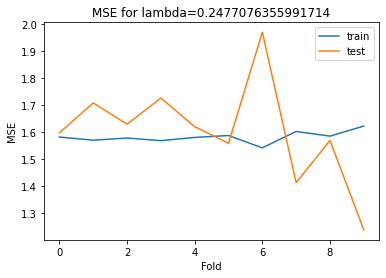

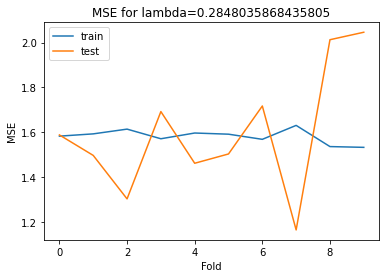

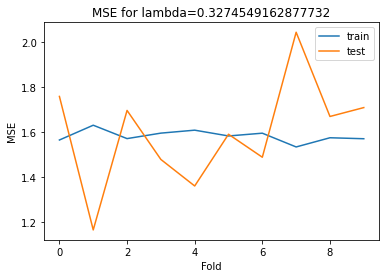

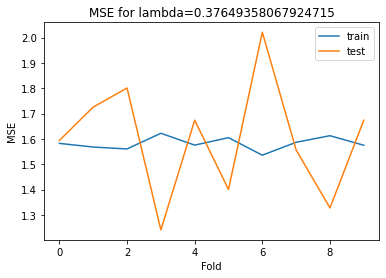

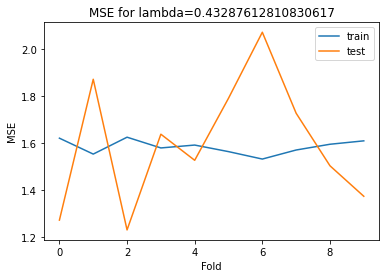

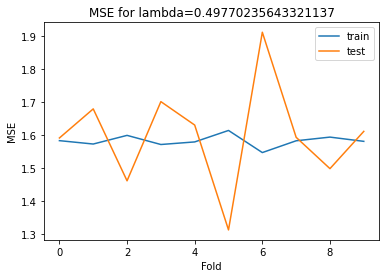

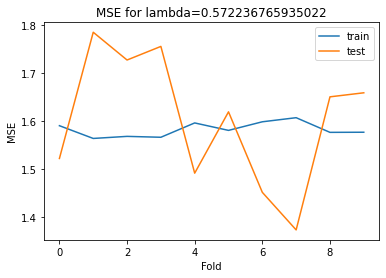

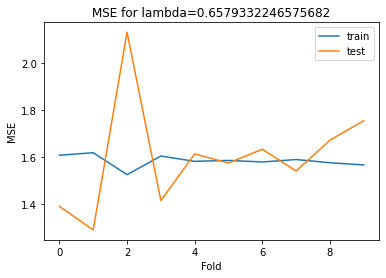

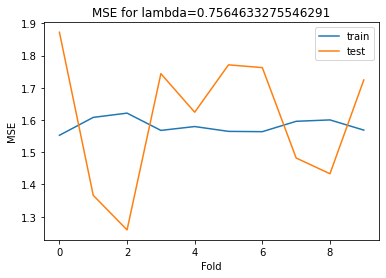

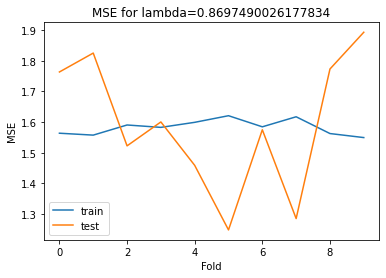

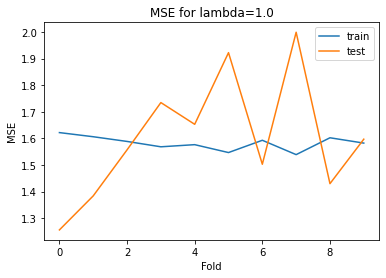

(86, 5)

In [13]:
x = data.drop(columns=['forecasted_performance'])
y = data['forecasted_performance'].values
lmbdas = np.logspace(-6, 0, 100)

mse_train, mse_test, min_mse_values = cross_validation_ridge(x, y, lmbdas)
min_mse_values

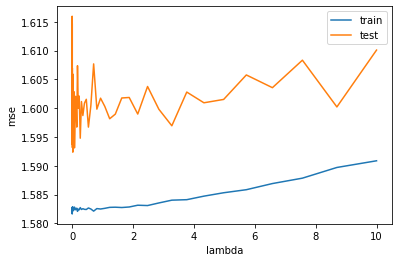

In [12]:
# calculo el mse promedio para cada lambda haciendo el promedio de los k-folds
mse_train_mean = mse_train.mean(axis=1)

#grafico
plt.plot(lmbdas, mse_train_mean, label='train')
plt.plot(lmbdas, mse_test.mean(axis=1), label='test')
plt.xlabel('lambda')
plt.ylabel('mse')
plt.legend()
plt.show()
